# **2. Importing all Essential Dependencies**

In [201]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Ensemble Models
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Tensorflow and Keras for Neural Network
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input

# Useful 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as Imbpipeline
from imblearn.over_sampling import SMOTE

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# **1. Introduction and Understanding the Dataset**

This dataset contains extensive health information for 2,149 patients, each uniquely identified with IDs ranging from 4751 to 6900. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. It is ideal for researchers and data scientists looking to explore factors associated with Alzheimer's, develop predictive models, and conduct statistical analyses.

#### What's Alzheimer's Disease ?
Alzheimer's Disease is a brain illness that slowly destroys memory and thinking skills. It is the most common cause of dementia, which makes it hard for people to remember things, think clearly, and take care of themselves. The disease happens because of harmful changes in the brain, like the buildup of bad proteins. Symptoms typically begin with mild memory loss and confusion, eventually progressing to severe cognitive impairment and loss of the ability to perform daily activities. Risk factors include age, family history, genetics, lifestyle, and certain medical conditions. There is currently no cure, but treatments can help manage symptoms and improve quality of life.

#### Now lets understand each Columns:

**Demographic Details**
1. PatientID: A unique identifier assigned to each patient (4751 to 6900).
2. Age: The age of the patients ranges from 60 to 90 years.
3. Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
4. Ethnicity: The ethnicity of the patients, coded as follows:
    0: Caucasian
    1: African American
    2: Asian
    3: Other
5. EducationLevel: The education level of the patients, coded as follows:
    0: None
    1: High School
    2: Bachelor's
    3: Higher

**Lifestyle Factors**
1. BMI: Body Mass Index of the patients, ranging from 15 to 40.
2. Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
3. AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
4. PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
5. DietQuality: Diet quality score, ranging from 0 to 10.
6. SleepQuality: Sleep quality score, ranging from 4 to 10.

**Medical History**
1. FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
2. CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
3. Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
4. Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
5. HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.
6. Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

**Clinical Measurements**
1. SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
2. DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
3. CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
4. CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
5. CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
6. CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

**Cognitive and Functional Assessments**
1. MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
2. FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
3. MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
4. BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
5. ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

**Symptoms**
1. Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.
2. Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.
3. PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.
4. DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
5. Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

**Target Variable**
* Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

**Confidential Information**
1. DoctorInCharge: This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.

# **3. Loading Dataset into DataFrame**

In [202]:
df = pd.read_csv("/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


# **4. Exploratory Data Analysis (EDA)**

We will first check if there's the need of Data Cleaning and Data Preprocessing by checking the shape, Null or missing values, duplicates, Outliers, Imbalance, etc then we will do proper Information extraction by doing Visualization using Matplotlib, Seboarn and Plotly

## A. Quick Analysis

In [203]:
pd.set_option('display.max_columns', 99)

In [204]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [205]:
df.shape

(2149, 35)

So the Dataset is pretty small, however it has alot of Columns!

### Checking Null or Missing values

In [206]:
df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Okay so no any Null Values, that saves us alot of time.

Now, lets check Duplicates

### Checking Duplicates values

Lets check if there's any Duplicated or Repeated entries for the same Patient, we will check using the "PatientID" column.

In [208]:
df['PatientID'].duplicated().sum()

0

Okay, so there's no Duplicates which is good, now since in Machine Learning we dont really have much use of ID's, we can simply drop this column, wont be a problem.

In [209]:
df.drop(['PatientID'], axis=1, inplace=True)
df.shape

(2149, 34)

### Check Column DataTypes

In [210]:
df.dtypes

Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
ADL                          float64
C

In [211]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


By Analysing each column types and format above we can see that all of the important columns are already in Numerical format (Except DoctorInCharge), So we wont need to do any Encoding, that saves alot of time.

However, we will need to divide the Numerical columns into **Non Binary** and **Binary** so According to that we can apply Scaling later.

Now, lets investigate the ONLY text column **DoctorInCharge** and see whats going on with it.

In [212]:
df['DoctorInCharge'].duplicated().sum()

2148

So the **DoctorInCharge** have the same value for all the rows meaning its useless, and it doesn't even contribute any information to the diagnosis as well, so i will just drop it.

In [213]:
df.drop(['DoctorInCharge'], axis=1, inplace=True)
df.shape

(2149, 33)

In [214]:
df.dtypes

Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
ADL                          float64
C

Alright, Now we only have Numeric columns.

Now, lets get all the Binary Numeric columns and store them into a variable for further uses.

In [215]:
binary_col = []
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        unique_val = df[col].nunique()
        if unique_val == 2:
            binary_col.append(col)
df[binary_col]

,Gender,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2145,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2147,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


We will do the same to get all Non Binary columns

In [216]:
nonbinary_col = []
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        unique_val = df[col].nunique()
        if unique_val > 2:
            nonbinary_col.append(col)
df[nonbinary_col]

,Age,Ethnicity,EducationLevel,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
0,73,0,2,22.927749,13.297218,6.327112,1.347214,9.025679,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,1.725883
1,89,0,0,26.827681,4.542524,7.619885,0.518767,7.151293,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,2.592424
2,73,3,1,17.795882,19.555085,7.844988,1.826335,9.673574,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,7.119548
3,74,0,1,33.800817,12.209266,8.428001,7.435604,8.392554,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,6.481226
4,89,0,0,20.716974,18.454356,6.310461,0.795498,5.597238,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0.014691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,1,39.121757,1.561126,4.049964,6.555306,7.535540,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,4.492838
2145,75,0,2,17.857903,18.767261,1.360667,2.904662,8.555256,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,9.204952
2146,77,0,1,15.476479,4.594670,9.886002,8.120025,5.769464,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,5.036334
2147,78,3,1,15.299911,8.674505,6.354282,1.263427,8.322874,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,3.785399


So we dont need to do any sort of Preprocessing for the Binary columns, but we do need to do some preprocessing later on the Non Binary columns.

Now, lets check Imbalance in the dataset as its important, we dont want an Imbalance in the dataset while building ML Models

### Check Imbalance

In [217]:
df['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

In [218]:
1389 / 760

1.8276315789473685

So the Imbalance ratio is 1.82:1 indicating that there are about 1.82 times more samples in the majority class than in the minority class.

To assess the imbalance, the following general guidelines can help:

* 1:1: Perfectly balanced.
* 1:2 to 1:4: Mild imbalance.
* 1:4 to 1:10: Moderate imbalance.
* 1:10+: Severe imbalance.

So our Dataset doesn't have a Severe Imbalance but still something needed to be handled.

NOTE: I will Handle the Imabalance in the dataset after Train Test split, that way there wont be any data leakage for Training or Testing set which can happen if you Oversample before doing Splitting

### Checking Outliers

lets Analyze the above Non-Binary Numeric Columns and see if there's any Outliers, we can do this simply by using the pandas describe() method first, which if you have some Domain knowledge and a Common sense you could tell if there's Outliers or not, else if you are not sure you can use Outliers Detection rules such as **3 Sigma rule**, **IQR rule** or the **Percentage Range rule**

In [219]:
df[nonbinary_col].describe()

,Age,Ethnicity,EducationLevel,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.697534,1.286645,27.655697,10.039442,4.920202,4.993138,7.051081,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,4.982958
std,8.990221,0.996128,0.904527,7.217438,5.757910,2.857191,2.909055,1.763573,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,2.949775
min,60.000000,0.000000,0.000000,15.008851,0.002003,0.003616,0.009385,4.002629,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.001288
25%,67.000000,0.000000,1.000000,21.611408,5.139810,2.570626,2.458455,5.482997,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,2.342836
50%,75.000000,0.000000,1.000000,27.823924,9.934412,4.766424,5.076087,7.115646,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,5.038973
75%,83.000000,1.000000,2.000000,33.869778,15.157931,7.427899,7.558625,8.562521,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,7.581490
max,90.000000,3.000000,3.000000,39.992767,19.989293,9.987429,9.998346,9.999840,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,9.999747


So upon analyzing, We can see there doesn't seem to be any Outliers, everything seems pretty neat, so we dont need to do any further Outliers detection since this is clear enough.

**From above table, We can come to a conclusion of our quick analysis:**

* Average age is 74
* 75% of patients are African American.
* Average BMI is 27-28
* On average patients have less Physical activity and bad Diet quality
* Average patients SystolicBP is 134 which indicates Hypertension stage 1
* Average patients DiastolicBP is 89-90 which indicates Elavated-High Hypertension
* Average Total Cholesterol is 225 which indicates Borderline High risk for cardiovascular diseases
* Average CholesterolLDL is 124 which indicates Near Optimal/Above Optimal risk of Heart disease
* Average CholesterolHDL is 59-60 which indicates Near high lvl which is okay
* Average CholesterolTriglycerides is 228 indicates High risk of Heart attack
* Average MMSE Score is 14-15 which indicates Moderate Cognitive Impairment
* Average FunctionalAssessment Score is 5 which indicates Moderate Impairment
* Average ADL Score is 4-5 which indicates Moderate Impairment

## B. Visualization and Deep Analysis

Now, lets get to Visualization to get further and in-dept Understanding of each columns, we will be checking Correlations, Distributions, etc for the Columns and come up with some Conclusions.

Note: I'm still learning, so im still not that good at Visualization but i try my best to and find an end Conclusion.

### Check Normality

First, I want to check the Normality of each columns using **Shapiro-Wilk Test**, I will store the Columns with Non-Normal Distribution into a seperate variable so we can maybe later apply **PowerTransformer** to it

In [220]:
from scipy.stats import shapiro
non_normal_columns = []
for column in df.columns:
    stat, p = shapiro(df[column].dropna())
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p={p}')
    if p < 0.05:
        non_normal_columns.append(column)
        print(f'{column} is not normally distributed (p < 0.05)')

Shapiro-Wilk Test for Age: Statistics=0.9523085951805115, p=6.702634951003267e-26
Age is not normally distributed (p < 0.05)
Shapiro-Wilk Test for Gender: Statistics=0.6365739107131958, p=0.0
Gender is not normally distributed (p < 0.05)
Shapiro-Wilk Test for Ethnicity: Statistics=0.7041070461273193, p=0.0
Ethnicity is not normally distributed (p < 0.05)
Shapiro-Wilk Test for EducationLevel: Statistics=0.8743445873260498, p=1.5386377649954423e-38
EducationLevel is not normally distributed (p < 0.05)
Shapiro-Wilk Test for BMI: Statistics=0.95578533411026, p=5.046097184703997e-25
BMI is not normally distributed (p < 0.05)
Shapiro-Wilk Test for Smoking: Statistics=0.5680265426635742, p=0.0
Smoking is not normally distributed (p < 0.05)
Shapiro-Wilk Test for AlcoholConsumption: Statistics=0.9545210599899292, p=2.3893753724051993e-25
AlcoholConsumption is not normally distributed (p < 0.05)
Shapiro-Wilk Test for PhysicalActivity: Statistics=0.9566808938980103, p=8.653607901124326e-25
Physic

In [221]:
non_normal_columns

['Age',
 'Gender',
 'Ethnicity',
 'EducationLevel',
 'BMI',
 'Smoking',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness',
 'Diagnosis']

In [222]:
len(non_normal_columns)

33

All of our columns are not normally distributed, we definately gonna have to apply **Power Scaling** to it during Preprocessing later.

### Check Distribution

Anyways, lets just get into Plotting, we will plot a Histplot for all of the Columns and Analyze their distributions, I can simply use a For loop and plot through all the Columns at once but i want to walk through each columns, so i will be plotting one by one and im creating a new DataFrame for only Diagnosis patients, where i will do the plotting on.

In [223]:
diagnosis_df = df[df['Diagnosis']==1]
def plot(column, dataframe=diagnosis_df):
    plt.figure(figsize=(8, 4))
    sns.histplot(dataframe[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

I will also create a function to plot both diagnosed vs not side by side just in case we might need it

In [224]:
def diagnosed_vs_not(column, dataframe):
    # Separate the diagnosed and non-diagnosed dataframes
    diagnosed_df = dataframe[dataframe['Diagnosis'] == 1]
    non_diagnosed_df = dataframe[dataframe['Diagnosis'] == 0]

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    
    # Plot for diagnosed patients
    sns.histplot(diagnosed_df[column], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {column} (Diagnosed)')

    # Plot for non-diagnosed patients
    sns.histplot(non_diagnosed_df[column], kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {column} (Non-Diagnosed)')

    plt.tight_layout()
    plt.show()

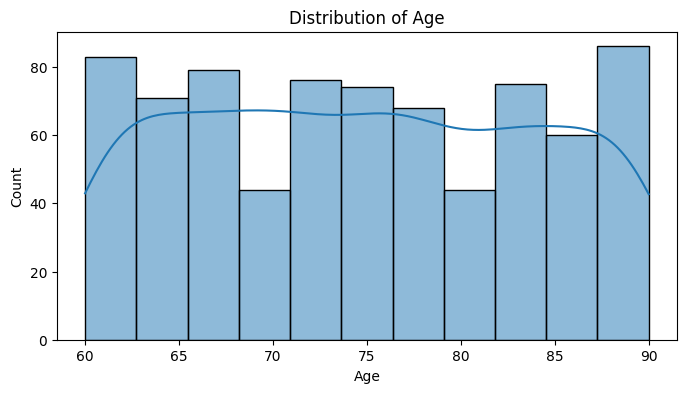

Average age of Alzheimer's Disease Patients is: 74.84210526315789


In [225]:
plot("Age")
print(f"Average age of Alzheimer's Disease Patients is: {np.mean(df[df['Diagnosis']==1]['Age'])}")

Well the Age column have a Uniform Distribution, we already saw above while checking the Normality of each columns that non of the columns have a Normal distirbution, so im assuming most of them are Uniform distribution, and the thing about Uniform distribution is its not very informative, but anyways, Average age of Patience who have Parkinson's Disease is 74 years old, which make sense because Alzheimer's Disease usually develops in middle or late life, with the average age of diagnosis being 70-75 years old and by age 85, the risk reaches nearly 50%.

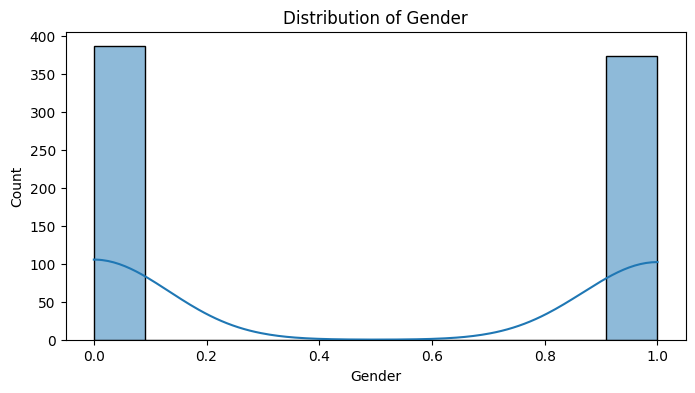

In [226]:
plot("Gender")

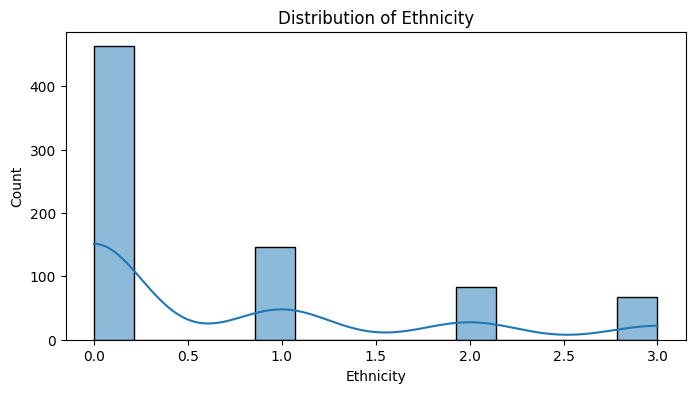

In [227]:
plot("Ethnicity")

Okay, so most Patients with Alzheimer's Disease are likely to be Caucasian, well it could also be maybe because in our Dataset there are more Caucasian as Caucasians are the most studied group in Alzheimer's research, lets check..

In [228]:
df['Ethnicity'].value_counts()

Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64

Yh, i was right, hmm, so lets do one thing, we will create seperate Dataframe for each Ethnicity and calculate the Percentage of each of them who are Diagnosed with the disease and see how many percentage have the disease

In [229]:
# Create separate DataFrames for each ethnicity
cau = df[df['Ethnicity'] == 0]
afr_am = df[df['Ethnicity'] == 1]
asian = df[df['Ethnicity'] == 2]
other = df[df['Ethnicity'] == 3]

# Calculate the percentage of patients diagnosed with Alzheimer's Disease in each ethnicity group
def calculate_percentage(df):
    diagnosed = df[df['Diagnosis'] == 1]
    percentage = (len(diagnosed) / len(df)) * 100
    return percentage


cau_percentage = calculate_percentage(cau)
afr_am_percentage = calculate_percentage(afr_am)
asian_percentage = calculate_percentage(asian)
other_percentage = calculate_percentage(other)

# Create a DataFrame for plotting
data = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Percentage Diagnosed': [cau_percentage, afr_am_percentage, asian_percentage, other_percentage]
}
plot_df = pd.DataFrame(data)

# Plot a pie chart using Plotly
fig = px.pie(plot_df, names='Ethnicity', values='Percentage Diagnosed', title='Percentage of Alzheimer\'s Disease Diagnoses by Ethnicity')
fig.show()

Welp, we can see a different story from the above pie chart, but yh its more of equally distributed

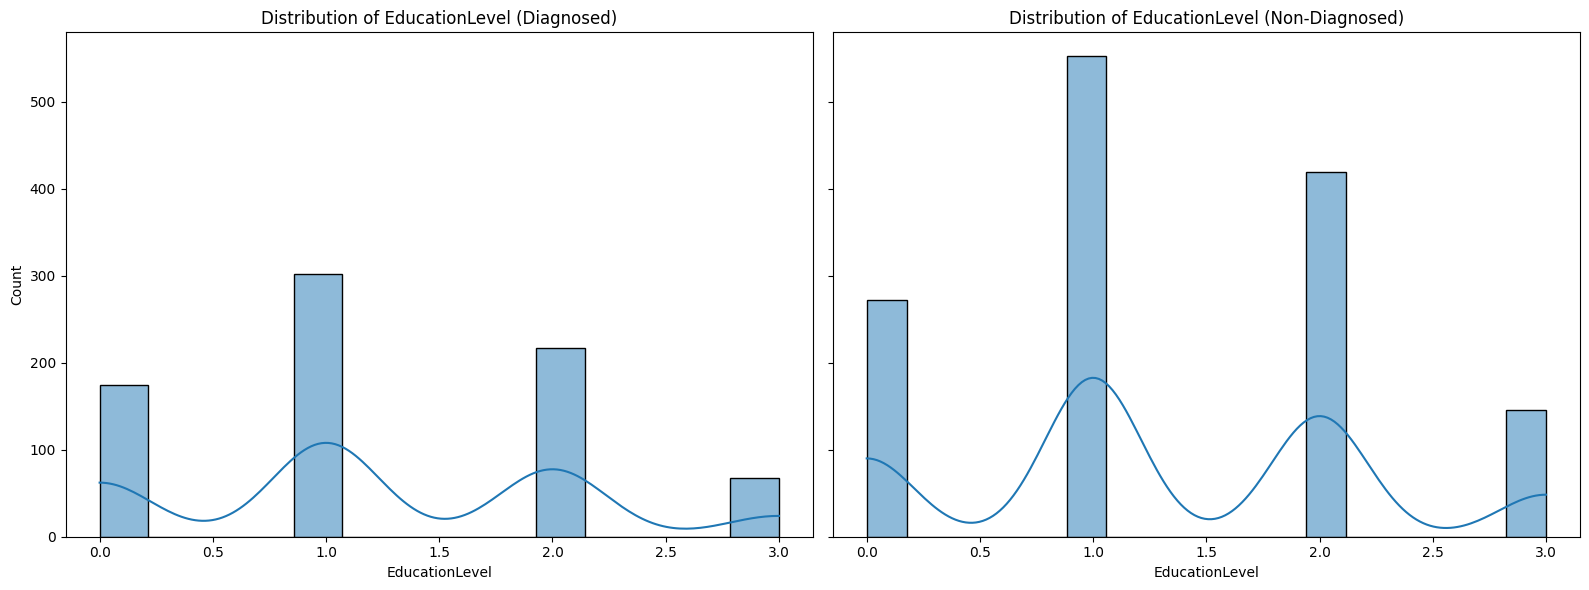

In [230]:
diagnosed_vs_not("EducationLevel", df)

### **Lifestyle Factors Visualization**

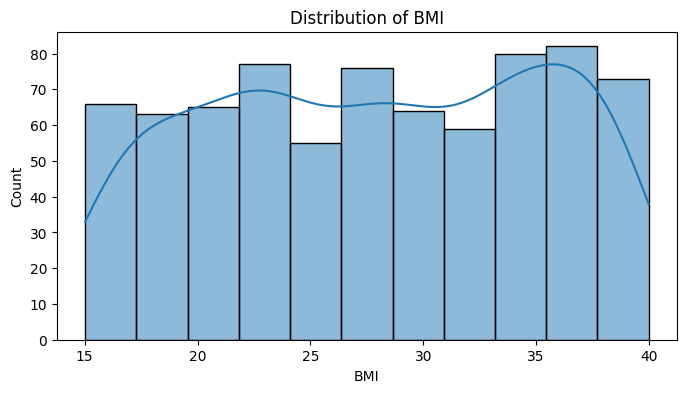

Average BMI of Alzheimer's Disease Patients is: 27.912670487663743


In [231]:
plot("BMI")
print(f"Average BMI of Alzheimer's Disease Patients is: {np.mean(df[df['Diagnosis']==1]['BMI'])}")

Okay, so BMI stands for Body Mass Index. It's a measure that uses a person's height and weight to estimate whether they are underweight, normal weight, overweight, or obese.

It categorizes individuals into different weight status categories:

* Underweight: BMI less than 18.5
* Normal weight: BMI 18.5 to 24.9
* Overweight: BMI 25 to 29.9
* Obesity: BMI 30 or higher

Although our BMI column have kind of a Uniform Distribution, we can still see the Average BMI of Alzheimer's Disease Patients is 27, But lets Categorize our BMI column into 4 categories for Patients with Alzheimer's Disease and plot a Pie Chart

In [232]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal weight'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

# Apply the function to create a new column
df['BMI_Category'] = diagnosis_df['BMI'].apply(categorize_bmi)

# Count the occurrences of each category
bmi_counts = df['BMI_Category'].value_counts().reset_index()
bmi_counts.columns = ['BMI_Category', 'Count']

# Plot the pie chart using Plotly
fig = px.pie(bmi_counts, values='Count', names='BMI_Category', title='BMI Categories Distribution')
fig.show()

In [233]:
df.drop(['BMI_Category'], axis=1, inplace=True)

According to the Obesity Action Coalition, adults with a BMI of 25.0–29.9 in mid-life (ages 45–55) have a higher chance of developing Alzheimer's disease or dementia later in life (ages 65 and older). Adults with a BMI of more than 30.0 in mid-life have an even higher risk of developing Alzheimer's disease and vascular dementia later in life, and we can see on average the Patients who are Diagnosed are between the 25-29 range with 40% of them being in the Obese category

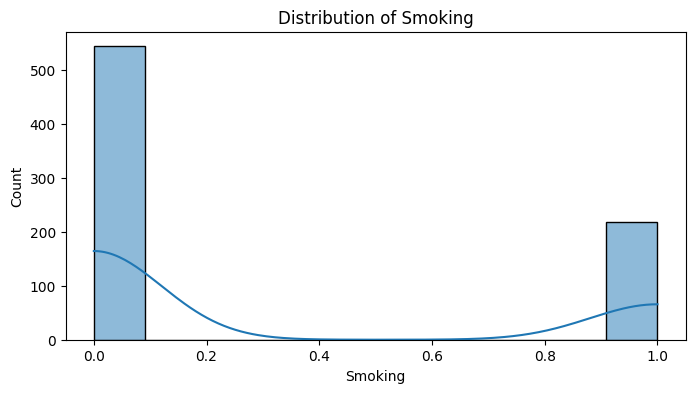

In [234]:
plot("Smoking")

Smoking is a risk factor for Alzheimer's disease (AD) and other types of dementia. The World Health Organization (WHO) estimates that smoking is responsible for 14% of AD cases worldwide. Smoking can increase the risk of AD in a number of ways.

We can see that more people dont smoke, but again this could be due to Imbalance in the dataset, lets analyze further

In [235]:
df['Smoking'].value_counts()

Smoking
0    1529
1     620
Name: count, dtype: int64

In [236]:
# Create separate DataFrames for smokers and non-smokers
smoke = df[df['Smoking'] == 1]
no_smoke = df[df['Smoking'] == 0]

# Calculate the percentage of patients diagnosed with Alzheimer's Disease for smokers and non-smokers
smoke_per = calculate_percentage(smoke)
nosmoke_per = calculate_percentage(no_smoke)

# Create a DataFrame for plotting
data = {
    'Smoking': ['Non-Smoker', 'Smoker'],
    'Percentage Diagnosed': [nosmoke_per, smoke_per]
}
plot_df = pd.DataFrame(data)

# Plot a pie chart using Plotly
fig = px.pie(plot_df, names='Smoking', values='Percentage Diagnosed', title='Percentage of Alzheimer\'s Disease Diagnoses by Smoking Status')
fig.show()

So its 50-50 here

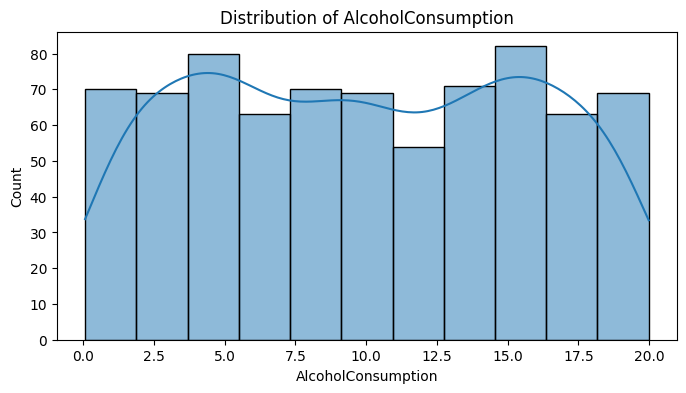

In [237]:
plot("AlcoholConsumption")

By looking at the graph we can see its a Uniform distribution again.

There is no consensus on the impact of alcohol on Alzheimer's disease (AD), The relationship between alcohol and Alzheimer's disease is complicated but some studies suggest that excessive drinking may increase the risk of dementia, and that heavy alcohol consumption may speed up cognitive decline in AD patients.

According to the Alzheimer's Association, alcohol use disorder is a risk factor for AD. Some studies suggest that alcohol may: Increase brain atrophy, Increase amyloid plaques, Cause brain injury, and Accelerate the loss of neurons and their connections. 
Other studies suggest that alcohol may not impact AD, or that it may even decrease the risk. However, the validity and consistency of alcohol and AD measures across studies may be a limitation. 

The National Institute for Health and Care Excellence (NICE) recommends reducing alcohol consumption as much as possible, especially in mid-life, to minimize the risk of developing age-related conditions like dementia

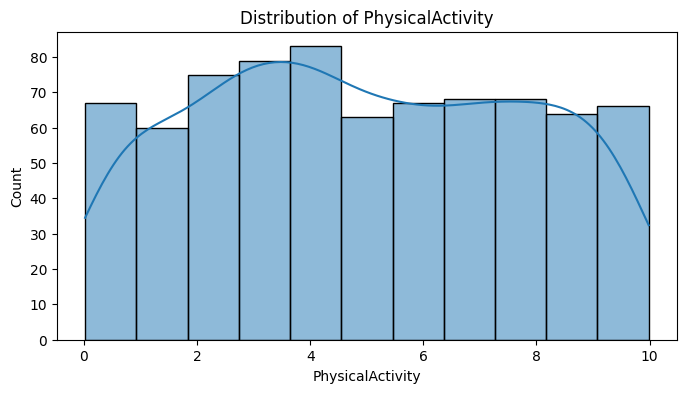

Average PhysicalActivity of Alzheimer's Disease Patients is: 4.94316032685271


In [238]:
plot("PhysicalActivity")
print(f"Average PhysicalActivity of Alzheimer's Disease Patients is: {np.mean(df[df['Diagnosis']==1]['PhysicalActivity'])}")

Low levels of physical activity are a risk factor associated with Alzheimer's disease. Older adults who exercise are more likely to maintain cognition and we can see that most Patients who are diagnosed have low physical activities

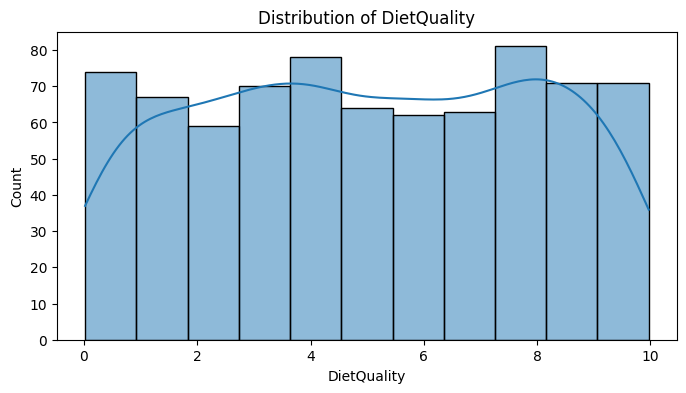

Average DietQuality of Alzheimer's Disease Patients is: 5.026581195817515


In [239]:
plot("DietQuality")
print(f"Average DietQuality of Alzheimer's Disease Patients is: {np.mean(df[df['Diagnosis']==1]['DietQuality'])}")

Diet quality is a critical factor in managing Alzheimer's Disease (AD) and potentially reducing the risk of developing it. Several dietary patterns and nutrients have been studied for their potential benefits in brain health and cognitive function.

Improving diet quality can be a crucial part of managing Alzheimer's Disease, supporting overall health, and potentially slowing the progression of cognitive decline.

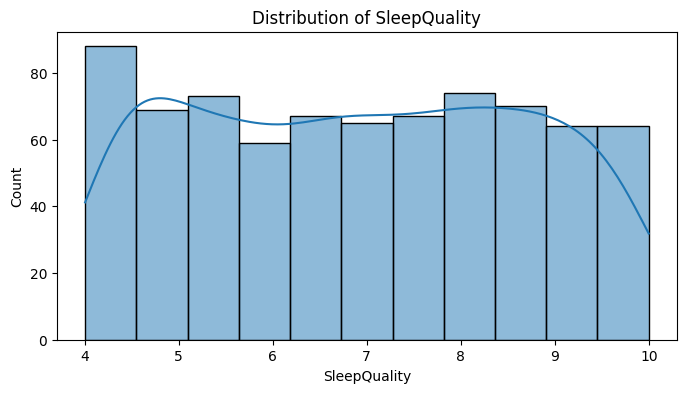

In [240]:
plot("SleepQuality")

Sleep quality is a crucial aspect of managing Alzheimer's Disease (AD) and can significantly impact cognitive function, overall health, and the progression of the disease.

Poor sleep quality and sleep disturbances are associated with impaired cognitive function. In Alzheimer's patients, inadequate sleep can exacerbate memory problems and other cognitive deficits. Sleep disturbances are common in AD and may contribute to the progression of the disease. 

Poor sleep can worsen behavioral and psychological symptoms of dementia (BPSD), such as agitation, depression, and anxiety, leading to increased caregiver burden.

Improving sleep quality in Alzheimer's Disease patients requires a comprehensive approach that includes lifestyle modifications, environmental adjustments, and, when necessary, medical interventions. Good sleep hygiene practices and a supportive sleep environment can significantly enhance the quality of life for patients

### **Patient's Medical History Visualization**

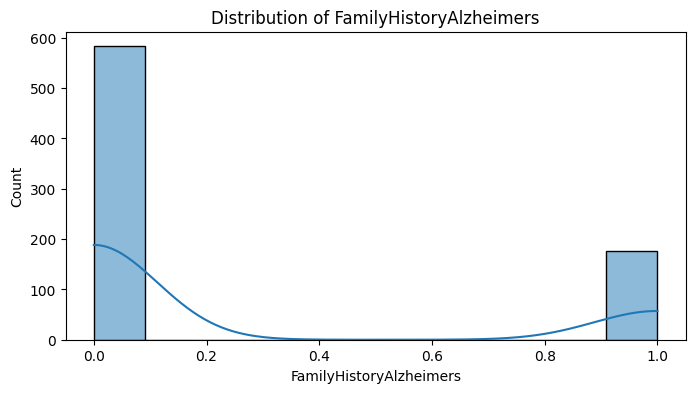

In [241]:
plot("FamilyHistoryAlzheimers")

Most of the Patients dont have any Family history of the Disease, Family history is not necessary for an individual to develop Alzheimer's. However, research shows that those who have a parent or sibling living with Alzheimer's are more likely to develop the disease than those who do not have a first-degree relative with Alzheimer's.


Lets do one thing, we will analyse the percentage of Patients having diagnosed with Alzheimer who has a family history of the disease

In [242]:
def check_percent(col, df=df):
    col_name = df[df[col]==1]
    print(len(col_name[col_name['Diagnosis']==1]) / len(col_name) * 100)

In [243]:
check_percent("FamilyHistoryAlzheimers")

32.656826568265686


So yh, 32% Percent of patients who have a family history of the disease have also developed it

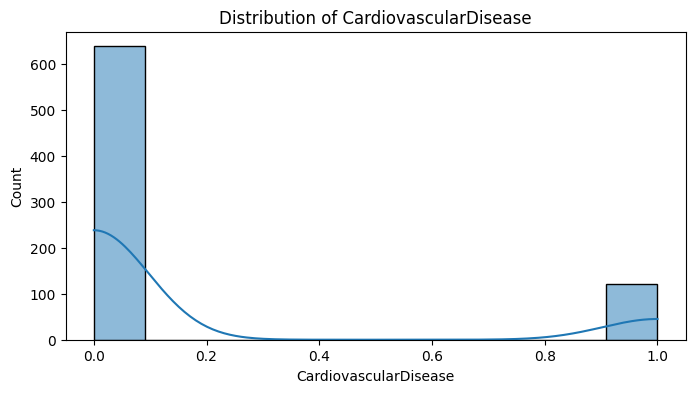

In [244]:
plot("CardiovascularDisease")

Most patients dont have any Cardiovascular Disease.

Cardiovascular disease (CVD) is a term for a range of conditions that affect the heart and blood vessels. Common types include coronary artery disease (which can lead to heart attacks), hypertension (high blood pressure), heart failure, and stroke. Essentially, it's any disease that affects the heart or blood vessels and can lead to serious health problems if not managed properly.

Cardiovascular disease is related to Alzheimer's disease because they share several risk factors and underlying mechanisms. Poor cardiovascular health, such as high blood pressure, high cholesterol, obesity, diabetes, and smoking, can increase the risk of developing Alzheimer's. The connection is primarily due to the impact that cardiovascular health has on brain health. 

So lets look into the Patients who have Cardiovascular Disease and see how many of them are actually diagnosed with Alzheimer's as well

In [245]:
check_percent("CardiovascularDisease")

39.03225806451613


So almost 40% of the patients with Cardiovascular Disease have developed Alzheimer's

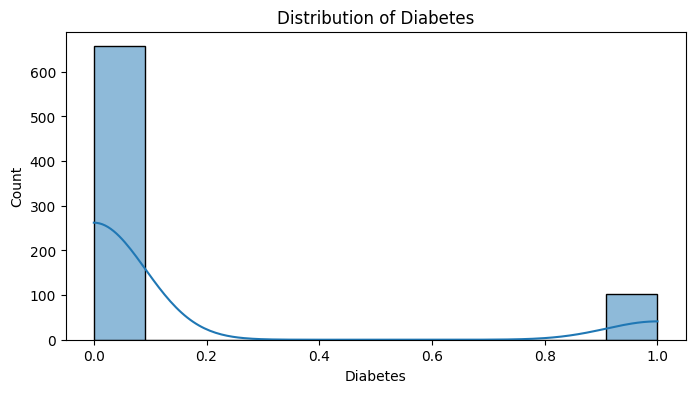

In [246]:
plot("Diabetes")

So its same here, most diagnosed patients dont have Diabete.

Diabetes is a condition where the body either doesn't produce enough insulin or can't use insulin properly, leading to high blood sugar levels. This can cause damage to the body's organs, including the heart and blood vessels, increasing the risk of cardiovascular diseases. Poor blood sugar control can also affect the brain, leading to an increased risk of developing Alzheimer's disease and other forms of dementia, although i dont think Diabeets contribute as much, probably like 30%

In [247]:
check_percent("Diabetes")

31.790123456790127


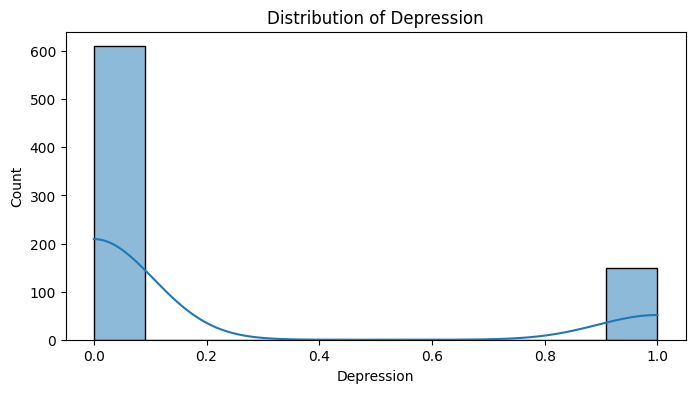

In [248]:
plot("Depression")

Depression is linked to an increased risk of developing Alzheimer's disease. While it's difficult to quantify exactly how much depression contributes to Alzheimer's on a specific scale, it is considered a significant risk factor. Depression can affect brain function and structure, potentially leading to changes that increase the likelihood of cognitive decline and dementia. Studies suggest that chronic depression, especially later in life, can double the risk of developing Alzheimer's disease

In [249]:
check_percent("Depression")

34.80278422273782


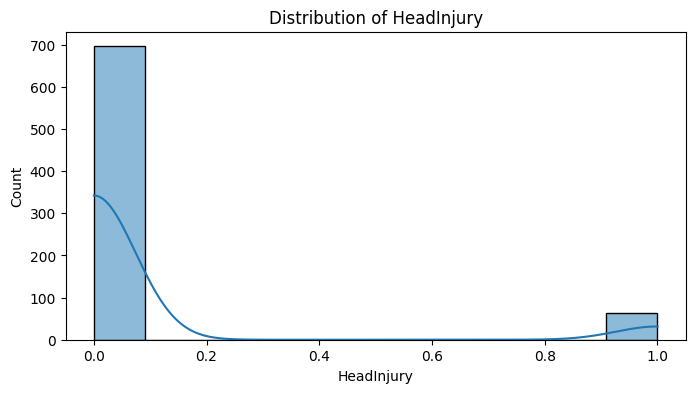

In [250]:
plot("HeadInjury")

People who have had a head injury are more likely to develop Alzheimer's disease. Head injuries, especially severe or repeated ones, can damage brain cells and lead to long-term changes in brain function. This damage can increase the risk of cognitive decline and dementia, including Alzheimer's disease. For example, traumatic brain injury (TBI) has been linked to a higher risk of Alzheimer's and other forms of dementia later in life. 

In [251]:
check_percent("HeadInjury")

32.1608040201005


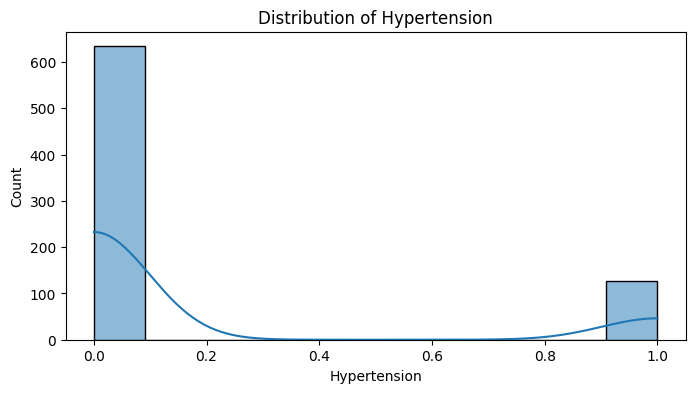

In [252]:
plot("Hypertension")

Hypertension is also a significant risk factor for Alzheimer's disease. High blood pressure can lead to damage in the blood vessels of the brain, reducing blood flow and causing brain cell damage. This can contribute to cognitive decline and increase the risk of Alzheimer's and other forms of dementia. 

In [253]:
check_percent("Hypertension")

39.375


Okay so, i want to address here:

In our Dataset of Medical History columns, there are only about 30-39% patients with them even though we know that these factors are pretty important or contribute when it comes to Patients having the disease or not and this can affect the performance of a machine learning models, so we will need to do some Oversampling or Feature Engineering later to handle these issues, We will address them in the Data Preprocessing part, for now, we will ignore it.

### **Clinical Measurements Visualization**

In [254]:
clinic_col = ["SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides"]

for col in clinic_col:
    fig = px.histogram(df, x=col, title=f'Histogram of {col}', 
                       color_discrete_sequence=['#636EFA'],
                       opacity=0.8)
    
    # Customize layout
    fig.update_layout(
        title_text=f'Histogram of {col}', # Title
        title_x=0.5,                      # Title position
        title_font=dict(size=20),         # Title font size
        xaxis_title_text=col,             # x-axis label
        yaxis_title_text='Count',         # y-axis label
        bargap=0.2,                       # Gap between bars
        template='plotly_dark',           # Dark theme
        paper_bgcolor='rgba(0,0,0,0)',    # Transparent background
        plot_bgcolor='rgba(0,0,0,0)',     # Transparent plot area
    )
    
    # Customize x and y axis
    fig.update_xaxes(showgrid=False, zeroline=False)
    fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGrey')

    fig.show()

Since I'm not an expert about the above 6 Clinical Measurements, i can't say much about it without Digging in deeper into their research, but anyways, They all have kind of a Uniform Distirbution, which is not very informative, i might be wrong though!

### **Cognitive and Functional Assessments Visualization**

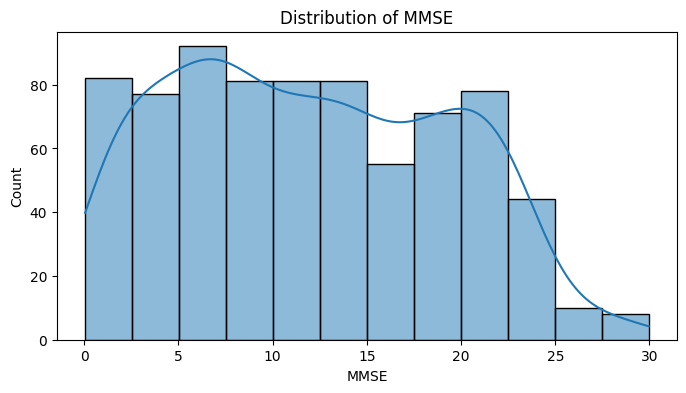

In [255]:
plot("MMSE")

This is a skewed distribution and we can see most Diagnosed patients have lower MMSE Scores, Scores below 24 indicate some level of cognitive impairment, with lower scores showing more severe impairment, which is associated with Alzheimer's Disease, so this is an important feature.

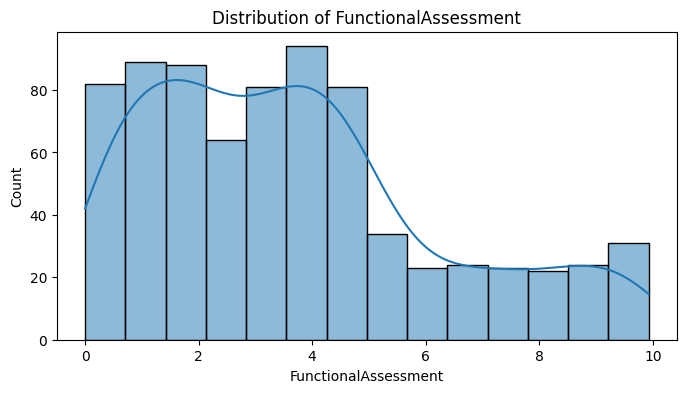

In [256]:
plot("FunctionalAssessment")

Most diagnosed patients have low scores below 4 which is bad as Lower scores indicate greater difficulty in performing daily activities, reflecting more severe functional impairment, often seen in Alzheimer's patients. This is also an Important feature

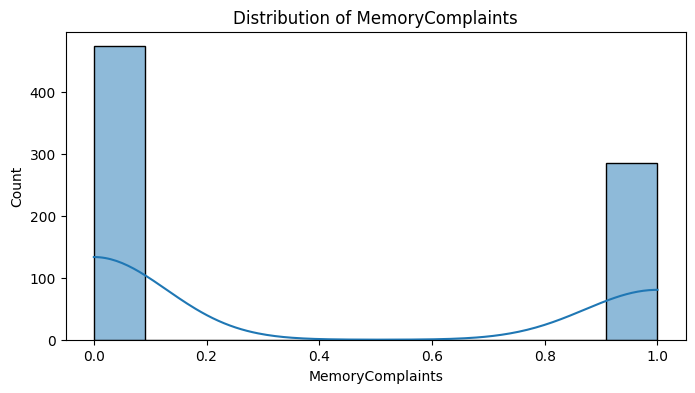

In [257]:
plot("MemoryComplaints")

In [258]:
check_percent("MemoryComplaints")

63.982102908277405


We can see a 63-65% Patients who have Presence of memory complaints also are Diagnosed with Alzheimer's Disease

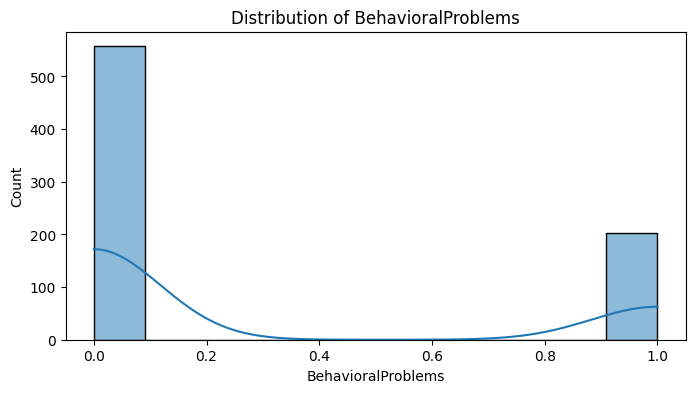

In [259]:
plot("BehavioralProblems")

In [260]:
check_percent("BehavioralProblems")

60.23738872403561


Patients with Behavioral Problems are 60% more likely to be Diagnosed with Alzheimer

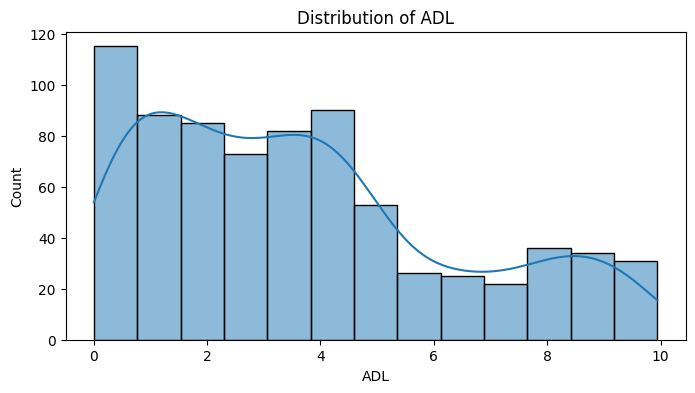

In [261]:
plot("ADL")

We can see most patients have lower ADL scores below 4 and we know that Lower scores indicate greater impairment.

So overall, the **Cognitive and Functional Assessments** columns are pretty useful and seems to contribute in determining whether a person have Alzheimer or not

### **Symptoms**

In [262]:
symptoms = ["Confusion", "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks", "Forgetfulness"]
for col in symptoms:
    fig = px.pie(values=df[col].value_counts(), names=df[col].value_counts().index, title=f"Percentage of {col}", hole=0.2)
    fig.update_traces(textinfo='percent+label')
    fig.show()

The above features play a role in determining Alzheimer's disease, but we can see most diagnosed patients of 70-85% dont have these so it might suggest that the dataset includes patients in various stages of the disease, or that these symptoms are not uniformly reported or recorded. Early-stage Alzheimer's might present with less pronounced symptoms, or the dataset might be missing some data.

Anyways, we will see if we can do some Feature Engineering as well for these later in the Preprocessing step.

### **Correlation Heatmap**

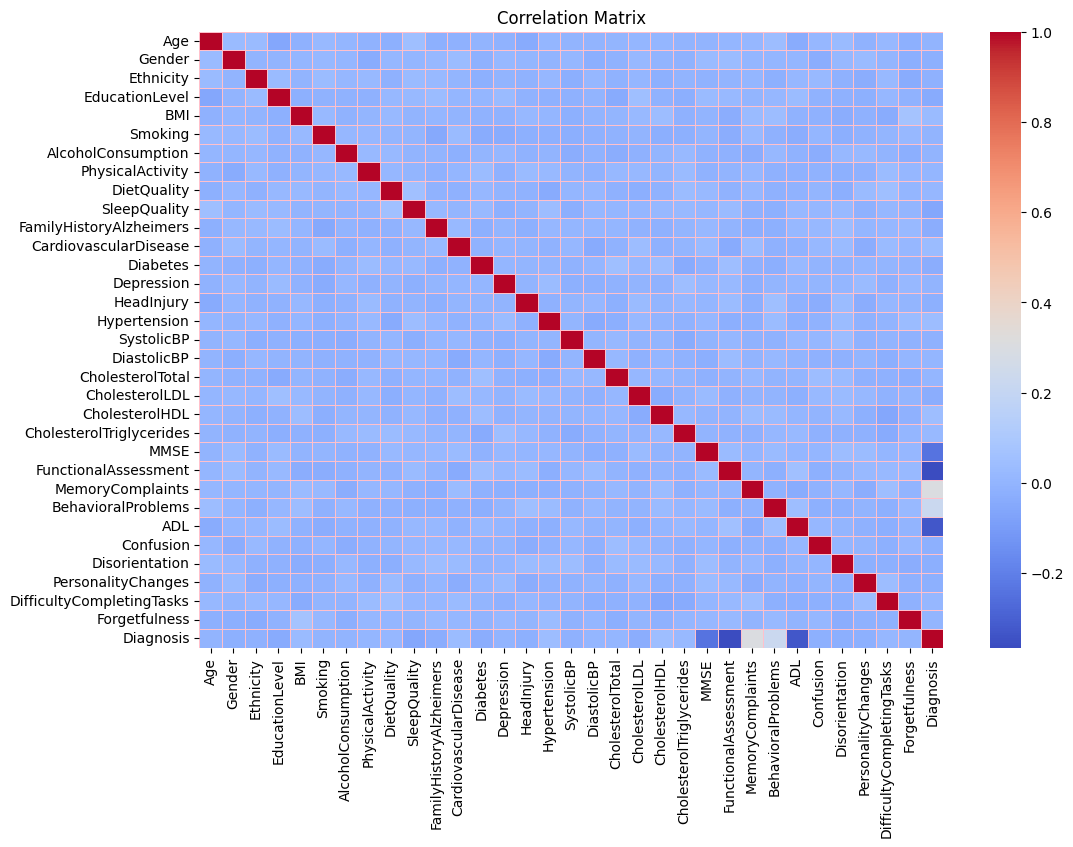

In [263]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="pink")
plt.title("Correlation Matrix")
plt.show()

We can see that

There are some strong Correlation between our Target variable with the **Cognitive and Functional Assessments** columns:

Negative correlation with MMSE, FunctionalAssesment and ADL.

Slight positive correlation with MemoryComplaints and BehavioralProblems.

### **Correlation with the target variable**

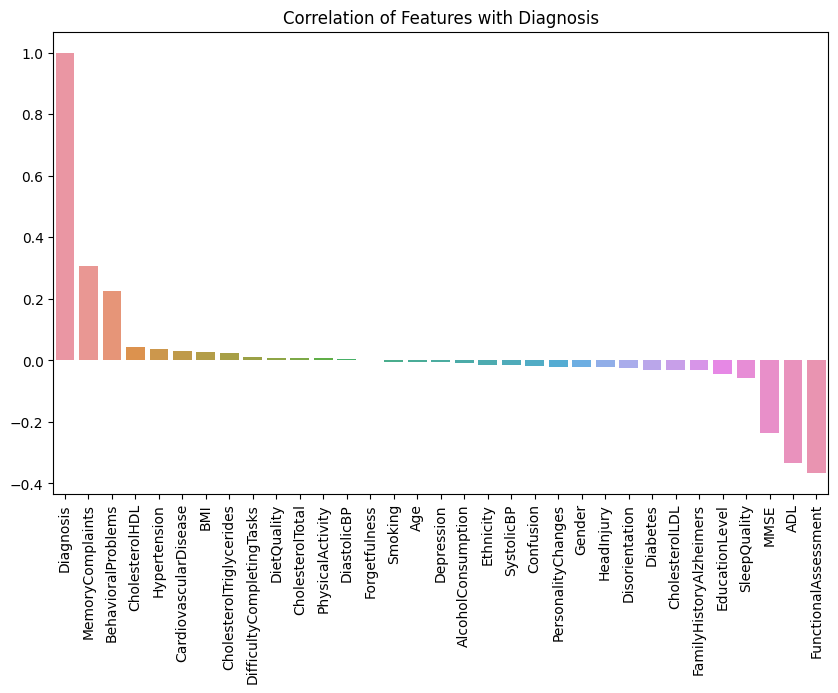

In [264]:
corr_with_target = df.corr()['Diagnosis'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Diagnosis')
plt.show()

Well, i think thats enough of Visualization and Analysis, now lets come to some end Conclusions

In [265]:
df.shape

(2149, 33)

## **C. CONCLUSIONS of EDA**

**Machine Learning**
* The Dataset is pretty small with over 2k datas but 33 (Useful) Features
* No Data Cleaning is required since there is no Missing values, Duplicates, Outliers nor any Wrong formatted values
* There are no Text Categorical columns meaning no Encoding is needed either
* There are Non-Binary Numerical columns which needed to be Scaled
* There is a Moderate Imbalance in the dataset which need to be handled
* Most of the columns are more of a Uniform Distribution rather than Normal (Gaussian) Distribution
* Feature Engineering is needed for Medical History columns as they are more impactful in predicting the disease
* Cognitive and Functional Assessments columns scores are important features for predicting the disease
* See if we can do some Feature Engineering on Symptoms columns to increase their contribution in predicting the disease


**Analysis Conclusions**
* Alzheimer's Disease usually develops in middle or late life, with the average age of diagnosis being 70-75 years old and by age 85, the risk reaches nearly 50%.
* 75% of patients are African American.
* Adults with a BMI of 25.0–29.9 in mid-life (ages 45–55) have a higher chance of developing Alzheimer's disease or dementia later in life (ages 65 and older). Adults with a BMI of more than 30.0 in mid-life have an even higher risk of developing Alzheimer's disease
* Smoking is responsible for 14% of AD cases worldwide. Smoking can increase the risk of AD in a number of ways
* Most Patients who are diagnosed have low physical activities
* Diet quality is a critical factor in managing Alzheimer's Disease (AD) and potentially reducing the risk of developing it
* Sleep quality is a crucial aspect of managing Alzheimer's Disease (AD) and can significantly impact cognitive function, overall health, and the progression of the disease
* 32% Percent of patients who have a family history of the disease have also developed it
* Cardiovascular disease is related to Alzheimer's disease because they share several risk factors and underlying mechanisms. Poor cardiovascular health, such as high blood pressure, high cholesterol, obesity, diabetes, and smoking, can increase the risk of developing Alzheimer's. 40% of the patients with Cardiovascular Disease have developed Alzheimer's
* 30% Patients with Diabetes are diagnosed with Alzheimer
* Depression is linked to an increased risk of developing Alzheimer's disease. it is considered a significant risk factor as 34% Patients who have Depression are diagnosed with Alzheimer
* 32% Patients with Head injury have Alzheimer, People who have had a head injury are more likely to develop Alzheimer's disease. Head injuries, especially severe or repeated ones, can damage brain cells and can increase the risk of cognitive decline and dementia, including Alzheimer's disease
* Hypertension is also a significant risk factor for Alzheimer's disease with 39% patients with Hypertension are diagnosed with the disease
* 63-65% Patients who have Presence of memory complaints also are Diagnosed with Alzheimer's Disease
* Patients with Behavioral Problems are 60% more likely to be Diagnosed with Alzheimer

# **5. Data Preprocessing**

In [266]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1


## **A. Data Cleaning**

No Data Cleaning is required as we have Concluded that in the EDA part

## **B. Feature Engineering**

As we have analyzed during EDA part, there are no Text Categorical Columns so no need of any Encoding, However, we do have Non-Binary Numerical Columns that needed to be scaled and also we need to make our Data more Gaussian like as well.

We will also need to create some new features to give more impact to Medical History columns and Symptoms columns as they are more impactful in predicting the disease

So first we will create some important features from Medical History and Symptoms columns and then we will create a Pipeline to do Imputing (just incase), Scaling and apply Power Transformer to make the data have more of a Normal Distribution

In [267]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


### **Feature Engineering on Medical History columns**

We can Create a composite score that sums up the presence of risk factors. For instance, a new feature that is the sum of FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, and Hypertension.

In [268]:
df['RiskFactorScore'] = df[['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']].sum(axis=1)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,RiskFactorScore
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,2
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,1
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,0


We can create new features that represent the interaction between diabetes and cardiovascular disease.

This acts as an indicator that both conditions are present simultaneously. This new feature can help our model capture the combined effect of having both diabetes and cardiovascular disease.

In [269]:
df['Diabetes_CVD'] = df['Diabetes'] * df['CardiovascularDisease']
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,RiskFactorScore,Diabetes_CVD
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,2,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,0,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,1,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,0,0


We can also create age buckets. Alzheimer's risk increases with age, so categorizing ages into groups like 60-70, 70-80, 80+, etc., might be useful.

For some reason i was getting NAN value below where age is 60 due to it being right-inclusive.

reason:

The issue where the AgeGroup column shows NaN for age 60 likely arises because the bin edges you specified do not include the lower bound of your age range. In pd.cut, the default behavior is to be right-inclusive (i.e., the right edge is included in the bin), but the left edge is not. Therefore, the age 60 is not being included in the first bin [60, 70).

To include 60 in the range, you can adjust the right parameter to False, making the bins left-inclusive. 

In [270]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[60, 70, 80, 90, 100], labels=['60-70', '70-80', '80-90', '90+'], right=False)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,RiskFactorScore,Diabetes_CVD,AgeGroup
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,2,0,70-80
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,0,0,80-90
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,1,0,70-80
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,0,0,70-80
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,0,0,80-90


In [271]:
df['AgeGroup'].unique()

['70-80', '80-90', '60-70', '90+']
Categories (4, object): ['60-70' < '70-80' < '80-90' < '90+']

In [272]:
df[df['Age']==60]

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,RiskFactorScore,Diabetes_CVD,AgeGroup
37,60,1,0,2,31.568689,0,3.478409,4.773200,8.856834,5.539086,0,1,0,0,1,0,157,98,195.472709,58.260787,31.224840,239.809323,16.640194,6.538658,0,1,7.605224,1,0,0,0,0,0,2,0,60-70
109,60,1,0,2,24.974286,0,18.454896,3.722786,3.795212,5.401475,0,0,0,0,0,0,147,111,162.439707,62.464567,48.232967,107.560343,22.658849,8.039720,0,0,6.943432,0,0,1,0,1,0,0,0,60-70
116,60,1,0,0,30.017337,0,6.369179,5.371701,4.475316,8.054286,0,0,1,0,0,0,160,93,275.845739,110.267740,97.330825,311.738001,10.720277,9.973697,0,0,6.499084,0,0,0,0,0,0,1,0,60-70
117,60,0,0,0,33.112496,0,0.722470,4.382985,1.612895,5.009484,1,0,0,0,1,0,129,107,279.653755,173.137636,70.456119,337.478845,5.507832,2.876671,0,0,1.822084,0,0,0,0,0,1,2,0,60-70
127,60,1,2,0,33.011119,0,18.924953,4.550098,2.913664,6.885777,0,0,0,0,0,0,175,78,254.789903,136.603404,27.912916,98.048914,18.504233,6.425784,1,0,1.953280,0,0,0,0,0,1,0,0,60-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,60,1,1,2,33.272558,1,4.404632,0.593053,1.780646,4.153488,1,0,0,0,0,0,105,82,207.925972,160.918330,52.621916,315.818271,7.493069,4.228070,1,0,0.507718,0,0,1,0,1,1,1,0,60-70
2076,60,1,0,2,34.207502,1,11.258799,8.559800,3.339307,6.408287,0,1,0,1,0,0,96,69,285.004077,111.910966,63.309664,273.039636,3.660698,1.860304,0,1,5.319320,0,0,0,0,0,1,2,0,60-70
2082,60,1,0,1,37.089995,0,6.879326,3.611449,0.016446,6.478630,0,0,0,1,0,0,132,78,276.336741,173.279386,72.547319,268.235203,7.347983,4.160138,1,0,2.273081,0,1,1,0,0,0,1,0,60-70
2113,60,1,2,1,22.677545,0,12.121508,5.701564,8.213415,4.300610,0,1,0,0,0,0,134,68,247.361752,50.430083,26.103451,139.715023,27.535144,6.019407,0,0,0.004354,0,0,1,1,0,1,1,0,60-70


Perfect, now there's no NAN values

We can also Create a feature that indicates if an individual has at least one risk factor. This can highlight patients who are exposed to any risk.

In [273]:
df['HasAnyRiskFactor'] = df[['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']].apply(lambda x: 1 if x.sum() > 0 else 0, axis=1)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,RiskFactorScore,Diabetes_CVD,AgeGroup,HasAnyRiskFactor
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,2,0,70-80,1
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,0,0,80-90,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,1,0,70-80,1
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,0,0,70-80,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,0,0,80-90,0


### **Feature Engineering on Symptoms columns**

Given that our symptom columns are binary and the majority of diagnosed patients do not exhibit these symptoms, we will do some feature engineering to potentially enhance the model

We can Create a feature that counts the number of symptoms present for each patient. This can help capture the overall symptom burden

In [274]:
df['SymptomCount'] = df[['Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']].sum(axis=1)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,RiskFactorScore,Diabetes_CVD,AgeGroup,HasAnyRiskFactor,SymptomCount
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,2,0,70-80,1,1
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,0,0,80-90,0,1
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,1,0,70-80,1,2
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,0,0,70-80,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,0,0,80-90,0,2


We will also Create a binary feature that indicates whether any of the symptoms are present. This can highlight patients who have at least one symptom.

In [275]:
df['HasAnySymptom'] = df[['Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']].apply(lambda x: 1 if x.sum() > 0 else 0, axis=1)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,RiskFactorScore,Diabetes_CVD,AgeGroup,HasAnyRiskFactor,SymptomCount,HasAnySymptom
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,2,0,70-80,1,1,1
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,0,0,80-90,0,1,1
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,1,0,70-80,1,2,1
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,0,0,70-80,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,0,0,80-90,0,2,1


In [276]:
df.shape

(2149, 39)

In [277]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,RiskFactorScore,Diabetes_CVD,AgeGroup,HasAnyRiskFactor,SymptomCount,HasAnySymptom
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,2,0,70-80,1,1,1
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,0,0,80-90,0,1,1
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,1,0,70-80,1,2,1
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,0,0,70-80,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,0,0,80-90,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,0,0,60-70,0,1,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,0,0,70-80,0,0,0
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,0,0,70-80,0,0,0
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,1,0,70-80,1,1,1


### **Encoding**

In [278]:
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True).astype(int)
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,RiskFactorScore,Diabetes_CVD,HasAnyRiskFactor,SymptomCount,HasAnySymptom,AgeGroup_70-80,AgeGroup_80-90,AgeGroup_90+
0,73,0,0,2,22,0,13,6,1,9,0,0,1,1,0,0,142,72,242,56,33,162,21,6,0,0,1,0,0,0,1,0,0,2,0,1,1,1,1,0,0
1,89,0,0,0,26,0,4,7,0,7,0,0,0,0,0,0,115,64,231,193,79,294,20,7,0,0,2,0,0,0,0,1,0,0,0,0,1,1,0,1,0
2,73,0,3,1,17,0,19,7,1,9,1,0,0,0,0,0,99,116,284,153,69,83,7,5,0,0,7,0,1,0,1,0,0,1,0,1,2,1,1,0,0
3,74,1,0,1,33,1,12,8,7,8,0,0,0,0,0,0,118,115,159,65,68,277,13,8,0,1,6,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,89,0,0,0,20,0,18,6,0,5,0,0,0,0,0,0,94,117,237,92,56,291,13,6,0,0,0,0,0,1,1,0,0,0,0,0,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39,0,1,4,6,7,0,0,0,0,0,0,122,101,280,94,60,234,1,0,0,0,4,1,0,0,0,0,1,0,0,0,1,1,0,0,0
2145,75,0,0,2,17,0,18,1,2,8,0,0,0,0,0,0,152,106,186,95,93,367,6,8,0,1,9,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2146,77,0,0,1,15,0,4,9,8,5,0,0,0,0,0,0,115,118,237,156,99,294,17,1,0,0,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2147,78,1,3,1,15,0,8,6,1,8,0,1,0,0,0,0,103,96,242,52,81,145,4,5,0,0,3,0,0,0,0,1,1,1,0,1,1,1,1,0,0


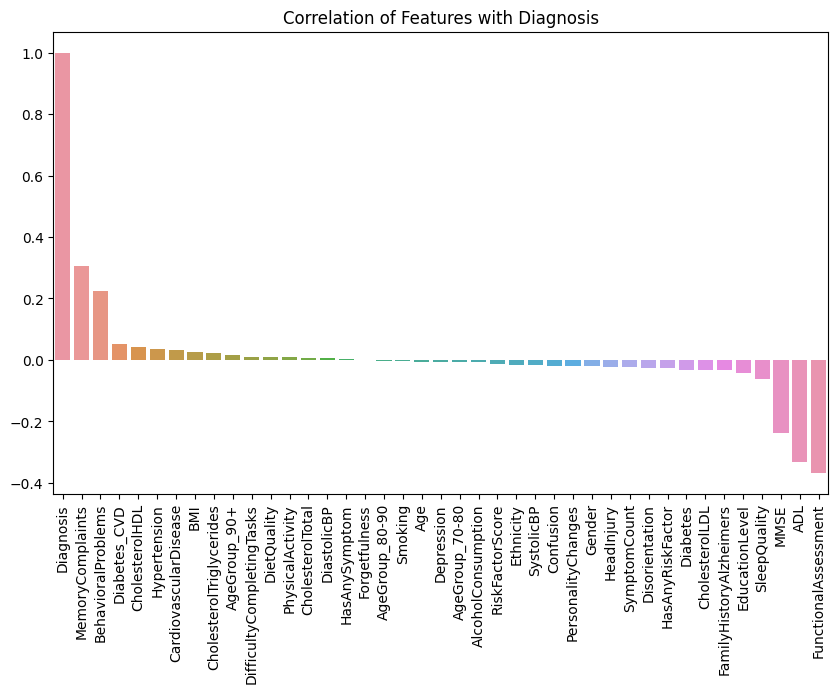

In [279]:
corr_with_target = df.corr()['Diagnosis'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Diagnosis')
plt.show()

### Now lets create a Pipeline to Scale and Transform all the Non-Binary Numerical columns

In [280]:
binary_col = []
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        unique_val = df[col].nunique()
        if unique_val == 2:
            binary_col.append(col)
df[binary_col]

,Gender,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Diabetes_CVD,HasAnyRiskFactor,HasAnySymptom,AgeGroup_70-80,AgeGroup_80-90,AgeGroup_90+
0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0
3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2145,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2147,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0


In [281]:
nonbinary_col = []
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        unique_val = df[col].nunique()
        if unique_val > 2:
            nonbinary_col.append(col)
df[nonbinary_col]

,Age,Ethnicity,EducationLevel,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,RiskFactorScore,SymptomCount
0,73,0,2,22,13,6,1,9,142,72,242,56,33,162,21,6,1,2,1
1,89,0,0,26,4,7,0,7,115,64,231,193,79,294,20,7,2,0,1
2,73,3,1,17,19,7,1,9,99,116,284,153,69,83,7,5,7,1,2
3,74,0,1,33,12,8,7,8,118,115,159,65,68,277,13,8,6,0,0
4,89,0,0,20,18,6,0,5,94,117,237,92,56,291,13,6,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,1,39,1,4,6,7,122,101,280,94,60,234,1,0,4,0,1
2145,75,0,2,17,18,1,2,8,152,106,186,95,93,367,6,8,9,0,0
2146,77,0,1,15,4,9,8,5,115,118,237,156,99,294,17,1,5,0,0
2147,78,3,1,15,8,6,1,8,103,96,242,52,81,145,4,5,3,1,1


In [282]:
binary_col.remove("Diagnosis")
len(binary_col)

21

In [283]:
df.shape

(2149, 41)

In [284]:
pipeline1 = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("power_transformer", PowerTransformer()),
    ("scaler", StandardScaler()),
])

pipeline2 = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
])

transformer = ColumnTransformer(transformers=[
    ("pipeline1", pipeline1, nonbinary_col),
    ("pipeline2", pipeline2, binary_col)
])

In [285]:
transformed_data = transformer.fit_transform(df.drop(['Diagnosis'],axis=1))
transformed_data

array([[-0.18448968, -0.81299856,  0.81250052, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.52875409, -0.81299856, -1.53155763, ...,  0.        ,
         1.        ,  0.        ],
       [-0.18448968,  1.56059501, -0.23602051, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.25939581, -0.81299856, -0.23602051, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.36863383,  1.56059501, -0.23602051, ...,  1.        ,
         0.        ,  0.        ],
       [-0.29726346, -0.81299856,  0.81250052, ...,  1.        ,
         0.        ,  0.        ]])

In [286]:
transformed_data.shape

(2149, 40)

We got our Transformed data, now we will simply extract the Features names and Create a new Transformed DataFrame out of it

In [287]:
pipeline1_features_names = transformer.\
named_transformers_['pipeline1'].get_feature_names_out(nonbinary_col).tolist()

pipeline2_features_names = transformer.\
named_transformers_['pipeline2'].get_feature_names_out(binary_col).tolist()

features_names = pipeline1_features_names + pipeline2_features_names
features_names

['Age',
 'Ethnicity',
 'EducationLevel',
 'BMI',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'ADL',
 'RiskFactorScore',
 'SymptomCount',
 'Gender',
 'Smoking',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'MemoryComplaints',
 'BehavioralProblems',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness',
 'Diabetes_CVD',
 'HasAnyRiskFactor',
 'HasAnySymptom',
 'AgeGroup_70-80',
 'AgeGroup_80-90',
 'AgeGroup_90+']

In [288]:
pd.set_option('display.max_columns', 100)
transformed_df = pd.DataFrame(transformed_data, columns=features_names)
transformed_df[binary_col] = transformed_df[binary_col].astype(int)
transformed_df['Diagnosis'] = df['Diagnosis']
transformed_df

,Age,Ethnicity,EducationLevel,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,RiskFactorScore,SymptomCount,Gender,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diabetes_CVD,HasAnyRiskFactor,HasAnySymptom,AgeGroup_70-80,AgeGroup_80-90,AgeGroup_90+,Diagnosis
0,-0.184490,-0.812999,0.812501,-0.699520,0.636363,0.596626,-1.225392,1.409136,0.321958,-1.013897,0.419524,-1.662556,-1.130827,-0.598471,0.797721,0.532895,-1.197819,1.114437,0.221525,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0
1,1.528754,-0.812999,-1.531558,-0.134892,-0.921591,0.902577,-1.706272,0.272536,-0.727978,-1.479752,0.163842,1.516340,0.873734,0.671192,0.698867,0.845016,-0.790669,-1.245369,0.221525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,-0.184490,1.560595,-0.236021,-1.432576,1.510635,0.902577,-1.225392,1.409136,-1.382643,1.475501,1.378136,0.697103,0.480045,-1.475048,-0.772633,0.209765,0.855912,0.221944,1.157231,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0
3,-0.072451,-0.812999,-0.236021,0.816924,0.481398,1.197244,0.868632,0.844074,-0.608152,1.420037,-1.568601,-1.407118,0.439700,0.516498,-0.040250,1.147821,0.558246,-1.245369,-1.274806,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,1.528754,-0.812999,-1.531558,-0.988707,1.370565,0.596626,-1.706272,-0.893849,-1.593152,1.530922,0.303560,-0.699037,-0.060512,0.644045,-0.040250,0.532895,-1.670465,-1.245369,1.157231,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,-1.590997,-0.812999,-0.236021,1.603255,-1.602933,-0.058599,0.564827,0.272536,-0.449700,0.638668,1.287957,-0.649376,0.109730,0.115022,-1.727149,-1.726476,-0.076814,-1.245369,0.221525,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2145,0.038867,-0.812999,0.812501,-1.432576,1.370565,-1.226457,-0.810726,0.844074,0.696228,0.918806,-0.905628,-0.624669,1.398955,1.313908,-0.909274,1.147821,1.421565,-1.245369,-1.274806,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2146,0.259396,-0.812999,-0.236021,-1.736252,-0.921591,1.482239,1.161914,-0.893849,-0.727978,1.586298,0.303560,0.760697,1.616123,0.671192,0.393167,-1.263356,0.248246,-1.245369,-1.274806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2147,0.368634,1.560595,-0.236021,-1.736252,-0.175569,0.596626,-1.225392,0.844074,-1.216367,0.357252,0.419524,-1.780107,0.950499,-0.776772,-1.202405,0.209765,-0.420961,0.221944,0.221525,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1


In [289]:
transformed_df.dtypes

Age                          float64
Ethnicity                    float64
EducationLevel               float64
BMI                          float64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
SystolicBP                   float64
DiastolicBP                  float64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
ADL                          float64
RiskFactorScore              float64
SymptomCount                 float64
Gender                         int64
Smoking                        int64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
M

In [290]:
transformed_df.isna().sum()

Age                          0
Ethnicity                    0
EducationLevel               0
BMI                          0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
ADL                          0
RiskFactorScore              0
SymptomCount                 0
Gender                       0
Smoking                      0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
MemoryComplaints             0
BehavioralProblems           0
Confusion                    0
Disorientation               0
PersonalityChanges           0
Difficul

YAY!!! We are done doing Transformation on our Data! Now we can feed this Datas into a Machine Learning Model

Now we can move on to the Most Interesting part!

# **6. Machine Learning**

## **A. Data Splitting**

In [291]:
X = transformed_df.drop(['Diagnosis'], axis=1)
y = transformed_df['Diagnosis']

In [292]:
X.shape

(2149, 40)

I wont do Validation split since we have very small data, that would just limit our Data even more

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
len(X_train), len(X_test)

(1719, 430)

In [294]:
y_train.value_counts()

Diagnosis
0    1111
1     608
Name: count, dtype: int64

In [295]:
y_test.value_counts()

Diagnosis
0    278
1    152
Name: count, dtype: int64

We have very small dataset so thats the problem but anyways, now lets handle the Imbalance in the Dataset, I will use SMOTE

## **B. Oversampling using SMOTE**

In [296]:
smote = SMOTE(sampling_strategy="minority")
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

Diagnosis
0    1111
1    1111
Name: count, dtype: int64

## **C. Model Selection and Hyperparameters tuning**

We will use GridSearchCV and determine the Best Model with its Best hyper parameters and also Train an Artificial Neural Network (ANN) and see which Model or ANN performed the best then we will finalize that.

One of my fav things about ML is trying out different Models and Neural Network with different Hyperparameters and determine the best one, we will be doing exactly that with different Models, oh god, i just know its gonna take forever to Train for me due to my Potato Laptop 😢

We will check the score using the Cross Validation method as well as using the accuracy score and also check the ROC AUC score which is The ability to distinguish between classes.

In [297]:
def main_gridsearchcv(model_params):
    scores = []
    kfold = StratifiedKFold(n_splits=5)
    for model, mp in model_params.items():
        grid = GridSearchCV(mp['model'], mp['params'], cv=kfold, return_train_score=False)
        grid.fit(X_train_smote, y_train_smote)

        # Predictions
        y_pred = grid.predict(X_test)

        # Calculate metrics
        roc_auc = roc_auc_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        scores.append({
            "model" : model,
            "best_estimator" : grid.best_estimator_,
            "best_score" : grid.best_score_,
            "best_params" : grid.best_params_,
            "roc_auc": roc_auc,
            "accuracy": accuracy
        })
    resultdf = pd.DataFrame(scores, columns=["model", "best_estimator", "best_score", "best_params", "roc_auc", "accuracy"])
    return resultdf

Now lets create a Dictionary of some Selected Models with their Hyperparameters

In [298]:
model_params = {
    "svm" : {
        "model" : SVC(),
        "params" : {
            "C" : [1, 10, 20, 30, 50, 100],
            "kernel" : ['linear', 'poly', 'rbf'],
             "gamma" : ["auto", "scale"]
        }
    },
    
    "bagging_decision_tree": {
        "model": BaggingClassifier(estimator=DecisionTreeClassifier()),
        "params": {
            "n_estimators": [5, 10, 20, 50, 100, 150, 200, 270],
            "max_samples": [0.7, 0.8, 0.9],
            "estimator__criterion": ['gini', 'entropy'] 
        }
    },
    
    'random forest' : {
        "model" : RandomForestClassifier(),
        "params" : {
            "n_estimators" : [5, 10, 20, 50, 100, 150, 200],
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [None, 1,2,3]
        }
    },
    
    
    "knn" : {
        "model" : KNeighborsClassifier(),
        "params" : {
            "n_neighbors" : range(1, 30)
        }
    },
    
}

In [299]:
main_gridsearchcv(model_params)

,model,best_estimator,best_score,best_params,roc_auc,accuracy
0,svm,SVC(C=20),0.855578,"{'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}",0.762353,0.781395
1,bagging_decision_tree,"(DecisionTreeClassifier(criterion='entropy', r...",0.927986,"{'estimator__criterion': 'entropy', 'max_sampl...",0.944339,0.951163
2,random forest,"(DecisionTreeClassifier(criterion='entropy', m...",0.916764,"{'criterion': 'entropy', 'max_depth': None, 'n...",0.921313,0.934884
3,knn,KNeighborsClassifier(n_neighbors=2),0.813278,{'n_neighbors': 2},0.650771,0.693023


Okay, so we can see, its not a suprise that Bagging classifier got the highest score, even the ROC AUC is pretty high 94% with the used Parameter

But lets see if we can get better scores by using different Boosting Techniques such as

* AdaBoost
* Gradient Boosting
* XGBoost
* Light GBM
* CatBoost

Reason i didnt include any Parameters is it will take AGES to Train

In [300]:
boost_params = {
        "adaboost" : {
        "model" : AdaBoostClassifier(estimator=DecisionTreeClassifier()),
        "params" : {}
    },

    "gradient_boosting" : {
        "model" : GradientBoostingClassifier(),
        "params" : {}
    },

    "xgboost" : {
        "model" : xgb.XGBClassifier(),
        "params" : {}
    },

    "lightgbm" : {
        "model" : lgb.LGBMClassifier(verbose=-1),
        "params" : {}
    },

    "catboost" : {
        "model" : CatBoostClassifier(verbose=False),
        "params" : {}
    }
}
main_gridsearchcv(boost_params)

,model,best_estimator,best_score,best_params,roc_auc,accuracy
0,adaboost,(DecisionTreeClassifier(random_state=891976906)),0.870386,{},0.890122,0.890698
1,gradient_boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.930692,{},0.947629,0.953488
2,xgboost,"XGBClassifier(base_score=None, booster=None, c...",0.932053,{},0.937760,0.946512
3,lightgbm,LGBMClassifier(verbose=-1),0.937001,{},0.944339,0.951163
4,catboost,<catboost.core.CatBoostClassifier object at 0x...,0.937896,{},0.945830,0.951163


Honestly all of them have a very impressive high score but i think the top two is **CatBoost** and **LightGBM**, but since they all got very close scores, we could go with anyone, but i will finalize **CatBoost** because, well yh, i love cats 😝 

## **D. Artificial Neural Network (ANN)**

However i would like to Train an Artificial Neural Network (ANN) as well just for fun and check the Performance.

In [301]:
X_train_smote.shape

(2222, 40)

In [302]:
nn = Sequential([
    Input(shape=(40,)),
    Dense(units=40, activation="relu"),
    Dropout(0.3),
    Dense(units=64, activation="relu"),
#     Dropout(0.3),
    Dense(units=1, activation="sigmoid"),
])

nn.compile(optimizer="adam",
          loss='binary_crossentropy',
          metrics=['accuracy'])

nn.fit(X_train_smote, y_train_smote, epochs=100)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6232 - loss: 0.6513
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7480 - loss: 0.5430
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7592 - loss: 0.4921
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7769 - loss: 0.4744
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.4089
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8234 - loss: 0.3983
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.3976
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8297 - loss: 0.3868
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8416 - loss: 0.3675
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8529 - loss: 0.3488
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.3460
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [303]:
print(f"Evaluation score : {nn.evaluate(X_test, y_test)}")
y_pred = nn.predict(X_test)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]
print(f"ROC_AUC score : {roc_auc_score(y_test, y_pred)}")
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.4944  
Evaluation score : [0.5124695897102356, 0.8395348787307739]
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
ROC_AUC score : 0.8192446043165468
Accuracy : 0.8395348837209302


Okay, so The score is not as good as i expected, even though 85% is a pretty decent score, but not as good as the above Boosting algorithms, You can do Trial and Error with Num of Neurons, layers, Dropout and Epochs, maybe the score would go higher.

But anyways, Im finalizing CatBoost model as it performed the BEST!

## **E. Training and Predicting using Final Model**

In [304]:
kittycat = CatBoostClassifier(verbose=False)
kittycat.fit(X_train_smote, y_train_smote)
kittycat.score(X_test, y_test)

0.9511627906976744

In [305]:
final_predict = kittycat.predict(X_test)
roc_auc_score(y_test, final_predict)

0.9458301779628929

## **F. Evaluation on Final Model**

In [306]:
print(classification_report(y_test, final_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       278
           1       0.93      0.93      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430



WOW!! You can see the Report is very good!! Above 90% Scores for Precision, Recall and FI-Score for both the Classes (Keeping in mind that the Test dataset is Imbalance as welll)

Text(95.72222222222221, 0.5, 'Truth Values')

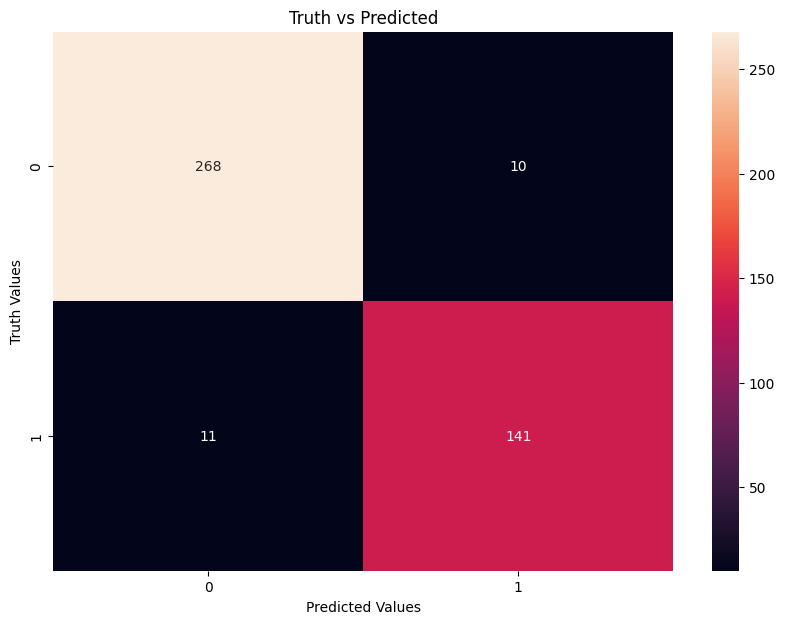

In [307]:
cm = confusion_matrix(y_test, final_predict)
plt.figure(figsize=(10, 7))
plt.title("Truth vs Predicted")
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("Truth Values")

In [308]:
len(final_predict), np.sum(final_predict != y_test)

(430, 21)

Only 21 Misclassification out of 430 samples! Which is very IMPRESSIVE!

# **7. Save Model**

In [309]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [310]:
import pickle

# Save the model to a pickle file
with open('catboost_alzheimer_model.pickle', 'wb') as f:
    pickle.dump(kittycat, f)
print("Model Succesfully saved.")

Model Succesfully saved.


In [311]:
transformed_df.to_csv("preprocessd_alzheimer.csv")